### Generate templates for Fermipy

In [1]:
from gammapy.modeling.models import SkyModel, PowerLawSpectralModel, GaussianSpatialModel
from gammapy.maps import Map
import matplotlib.pyplot as plt

In [2]:
#best fit hess components locations 
hess_comp1_ra = 272.551 #deg
hess_comp1_dec = -19.344 #deg
hess_comp1_sigma = 0.622 #semi-major axis deg
hess_comp1_ecc = 0.824
hess_comp1_position_angle = 50.0 #deg

hess_comp2_ra = 272.400 #deg
hess_comp2_dec = -19.406 #deg
hess_comp2_sigma = 0.0953 #deg

In [3]:
outdir = '/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/common_files'

#### gammpy location are taken from here: https://hess-confluence.desy.de/confluence/pages/viewpage.action?pageId=327647235

#### Comp1

In [4]:
gauss_comp1_gammapy_loc = GaussianSpatialModel(lon_0=f"{hess_comp1_ra} deg", lat_0=f"{hess_comp1_dec} deg", 
                                               sigma=f"{hess_comp1_sigma} deg", e=hess_comp1_ecc, phi=f'{hess_comp1_position_angle} deg')

sum: 0.9999933313250859 sr


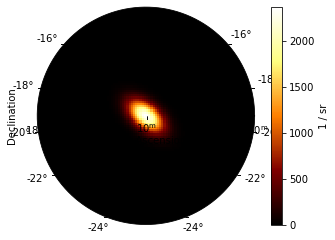

In [5]:
m_comp1_gammapy_loc = Map.create(skydir=(hess_comp1_ra, hess_comp1_dec), width=10, binsz=0.1, frame="icrs", proj='AIT', unit='deg^2')
m_comp1_gammapy_loc.quantity = gauss_comp1_gammapy_loc.evaluate_geom(m_comp1_gammapy_loc.geom)
print('sum:', (m_comp1_gammapy_loc.data * m_comp1_gammapy_loc.geom.bin_volume()).sum())
m_comp1_gammapy_loc.write(f'{outdir}/template_comp1_gammapy_loc.fits')
m_comp1_gammapy_loc.plot(add_cbar=True);

#### Comp2

In [6]:
gauss_comp2_gammapy_loc = GaussianSpatialModel(lon_0=f"{hess_comp2_ra} deg", lat_0=f"{hess_comp2_dec} deg", sigma=f"{hess_comp2_sigma} deg")

sum: 0.9999997603524292 sr


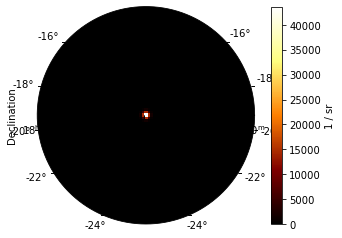

In [7]:
m_comp2_gammapy_loc = Map.create(skydir=(hess_comp2_ra, hess_comp2_dec), width=10, binsz=0.1, frame="icrs", proj='AIT', unit='deg^2')
m_comp2_gammapy_loc.quantity = gauss_comp2_gammapy_loc.evaluate_geom(m_comp2_gammapy_loc.geom)
print('sum:', (m_comp2_gammapy_loc.data * m_comp2_gammapy_loc.geom.bin_volume()).sum())
m_comp2_gammapy_loc.write(f'{outdir}/template_comp2_gammapy_loc.fits')
m_comp2_gammapy_loc.plot(add_cbar=True);

#### check if the header of the map created using Gammapy is similar to what is expected in Fermipy

In [8]:
from astropy.io import fits

In [9]:
test = fits.open(f'{outdir}/template_comp1_gammapy_loc.fits')

In [10]:
test.info()

Filename: /lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/common_files/template_comp1_gammapy_loc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (100, 100)   float64   


In [11]:
test[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 50.5 / Pixel coordinate of reference point            
CRPIX2  =                 50.5 / Pixel coordinate of reference point            
CDELT1  =                 -0.1 / [deg] Coordinate increment at reference point  
CDELT2  =                  0.1 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---AIT'        

In [12]:
model_fermipy_j1810 = fits.open('/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeV/roifit_noj1810_noj1811_pointsource_powerlaw_2.00_residmap.fits')

FileNotFoundError: [Errno 2] No such file or directory: '/lfs/l7/hawc/users/vikasj78/J1809-193_Analysis/hess-j1809/fermi_analysis/results1GeV/roifit_noj1810_noj1811_pointsource_powerlaw_2.00_residmap.fits'

In [ ]:
model_fermipy_j1810[3].header